
##### Analyst: Muhammad Hamza Jahangir

## Careem Data Analysis With Python

Careem Technologies, Inc., commonly known as Careem, is an Pakistan's technology company. Its services include ride-hailing, food delivery, package delivery, couriers.
We will main use data regarding Uber ride

we will use Python to analyze data of Careem.

##### We will use Python to see:
    What are the number of trips?
    How many careem's drivers serve according to city?
    What are the booking types?
    how long do people travel with Careem?
    What Hour Do Most People Take careem To Their Destination?
    Which service peoples use mostly?
    Which Day Has The Highest Number Of Trips?
    What Are The Number Of Trips Per Each Day?
    Which month has the highest number of trips?
    Which hours of the day highest trips are made weekday wise?
    What is the average of the trip price?
    What are the costs of the trips?
    What is the average duration of the trip?
    How many trips booked according to passengers?
    From which location the highest number of trips booked?
    How much distance covered in trips according to time?


The dataset for this project is taken from Kaggle.

## First, Import The Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib
import seaborn as sns
import datetime
import calendar
import networkx as nx
import warnings

In [2]:
df=pd.read_csv('Careem_data.csv',encoding='latin6',parse_dates=['Booked_Date'])
df.head()

,Booking ID,Trip ID,Service Area,Booking Type,Booked_Date,Car Type,AA1,Passenger,AA,Reference Code,...,Wait Time Min,Trip Currency,Discount,Trip Price,Payment Currency,Payment Price,Amount of Credit Used,Credit ID,Payment Type,Notes
0,1.094435e+09,756104590.0,Karachi,On Demand,2020-03-10 12:28:00,Bike,AA2,B2,AA,NaN,...,8.0,PKR,3,109,PKR,109,NaN,26218.0,Cash,NaN
1,1.092789e+09,754858038.0,Karachi,On Demand,2020-03-08 17:38:00,Bike,AA3,B2,AA,NaN,...,6.0,PKR,3,97,PKR,97,NaN,26218.0,Cash,NaN
2,1.092552e+09,754683006.0,Karachi,On Demand,2020-03-08 13:32:00,Bike,AA4,B3,AA,NaN,...,3.0,PKR,3,77,PKR,77,NaN,26218.0,Cash,NaN
3,1.086480e+09,750123752.0,Karachi,On Demand,2020-03-02 17:16:00,Bike,AA5,B4,AA,NaN,...,9.0,PKR,34,37,PKR,37,NaN,26218.0,Cash,NaN
4,1.077528e+09,743340406.0,Karachi,On Demand,2020-02-22 17:50:00,Bike,AA6,B5,AA,NaN,...,9.0,PKR,0,66,PKR,66,NaN,26218.0,Cash,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Booking ID             1037 non-null   float64       
 1   Trip ID                1037 non-null   float64       
 2   Service Area           1037 non-null   object        
 3   Booking Type           1037 non-null   object        
 4   Booked_Date            1037 non-null   datetime64[ns]
 5   Car Type               1037 non-null   object        
 6   AA1                    1037 non-null   object        
 7   Passenger              1037 non-null   object        
 8   AA                     1037 non-null   object        
 9   Reference Code         0 non-null      float64       
 10  Rating                 0 non-null      float64       
 11  Pickup Location        1037 non-null   object        
 12  Dropoff Location       1037 non-null   object        
 13  Dur

## Let's clean our data 

In [4]:
df=df.drop(['Notes',
         'Amount of Credit Used'
         ,'Tollgate Details GMT'
         ,'Tollgate'
         ,'Reference Code','Rating'],axis=1)

#### Check for Mising Values

In [5]:
df.isnull().sum()

Booking ID              0
Trip ID                 0
Service Area            0
Booking Type            0
Booked_Date             0
Car Type                0
AA1                     0
Passenger               0
AA                      0
Pickup Location         0
Dropoff Location        0
Duration                0
Total Distance          0
Moving Distance         0
Initial Wait            0
In-Journey Wait         0
Booked Pickup Time      0
Captain Arrival Time    0
Actual Pick-up Time     0
Drop-off time           0
Captain                 0
Car Make                0
Car Model               0
Wait Time Min           3
Trip Currency           0
Discount                0
Trip Price              0
Payment Currency        0
Payment Price           0
Credit ID               3
Payment Type            0
dtype: int64

In [6]:
df=df.fillna(method='ffill')

In [7]:
df.isnull().sum()

Booking ID              0
Trip ID                 0
Service Area            0
Booking Type            0
Booked_Date             0
Car Type                0
AA1                     0
Passenger               0
AA                      0
Pickup Location         0
Dropoff Location        0
Duration                0
Total Distance          0
Moving Distance         0
Initial Wait            0
In-Journey Wait         0
Booked Pickup Time      0
Captain Arrival Time    0
Actual Pick-up Time     0
Drop-off time           0
Captain                 0
Car Make                0
Car Model               0
Wait Time Min           0
Trip Currency           0
Discount                0
Trip Price              0
Payment Currency        0
Payment Price           0
Credit ID               0
Payment Type            0
dtype: int64

#### Now we can see that there are not missing values in the dataset.

## Date and Time formating of Data

##### Now we do Some formating on Booked_Date column to get out more insights about data.

In [8]:
df['Booked_Date'] = pd.to_datetime(df['Booked_Date'], format="%a %b %d %Y %H:%M:%S")

In [9]:
hour=[]
minutes=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['Booked_Date']:
    hour.append(x.hour)
    minutes.append(x.hour*60)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['MINUTES']=minutes
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

In [10]:
df.head()

,Booking ID,Trip ID,Service Area,Booking Type,Booked_Date,Car Type,AA1,Passenger,AA,Pickup Location,...,Payment Currency,Payment Price,Credit ID,Payment Type,HOUR,MINUTES,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,1.094435e+09,756104590.0,Karachi,On Demand,2020-03-10 12:28:00,Bike,AA2,B2,AA,Alama Iqbal Masjid - Jamshed Town - Karachi - ...,...,PKR,109,26218.0,Cash,12,720,10,1,3,Tuesday
1,1.092789e+09,754858038.0,Karachi,On Demand,2020-03-08 17:38:00,Bike,AA3,B2,AA,MCB Bank - M. A. Jinnah Road - Saddar - Karachi,...,PKR,97,26218.0,Cash,17,1020,8,6,3,Sunday
2,1.092552e+09,754683006.0,Karachi,On Demand,2020-03-08 13:32:00,Bike,AA4,B3,AA,Alama Iqbal Masjid - Jamshed Town - Karachi - ...,...,PKR,77,26218.0,Cash,13,780,8,6,3,Sunday
3,1.086480e+09,750123752.0,Karachi,On Demand,2020-03-02 17:16:00,Bike,AA5,B4,AA,"[24.87, 67.05]",...,PKR,37,26218.0,Cash,17,1020,2,0,3,Monday
4,1.077528e+09,743340406.0,Karachi,On Demand,2020-02-22 17:50:00,Bike,AA6,B5,AA,"[24.87, 67.05]",...,PKR,66,26218.0,Cash,17,1020,22,5,2,Saturday


## What are the number of trips?

In [11]:
df.shape[0]

1037

## How many careem's drivers serve according to city?

In [12]:
df['Service Area'].value_counts()

Karachi      1027
Hyderabad       7
Islamabad       3
Name: Service Area, dtype: int64

<AxesSubplot:>

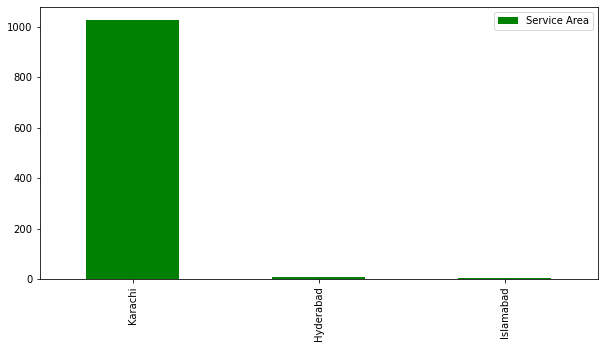

In [13]:
df['Service Area'].value_counts().to_frame().plot(kind='bar', color='green',figsize=(10,5))

## What are the booking types?

In [14]:

df['Booking Type'].value_counts()

On Demand    1035
Normal          2
Name: Booking Type, dtype: int64

<AxesSubplot:>

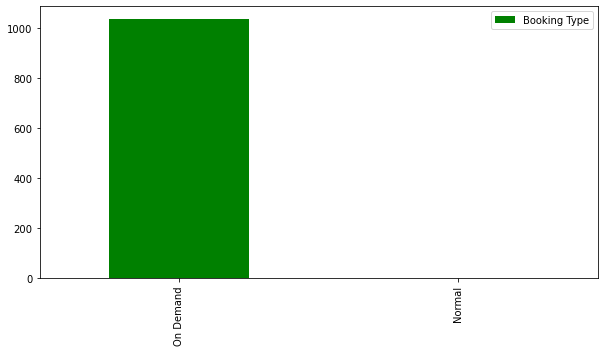

In [15]:
df['Booking Type'].value_counts().to_frame().plot(kind='bar', color='green',figsize=(10,5))

## How long do people travel with Careem?

<AxesSubplot:ylabel='Frequency'>

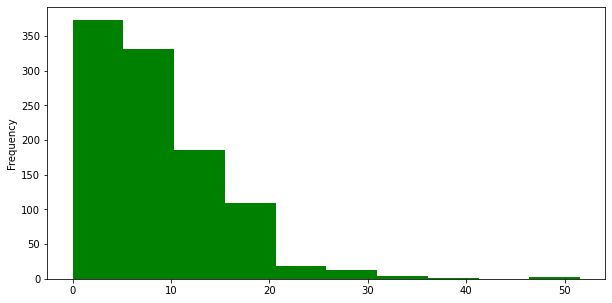

In [16]:
df['Total Distance'].plot.hist(color='green',figsize=(10,5))

##### As you can see mostly people travel arround 10 to 30 KM with Careem.

## What Hour Do Most People Take Careem To Their Destination?

Text(0.5, 1.0, 'Number of trips according to specific hour')

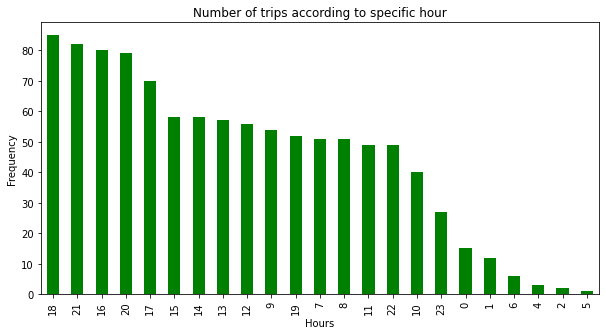

In [17]:
hours = df['Booked_Date'].dt.hour.value_counts()
hours.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips according to specific hour')

##### As we can see most people take Careem to their destination around the 18th hour (6pm) and the least hour is (5th) hour 5 am.

## Which service peoples use mostly?

<AxesSubplot:>

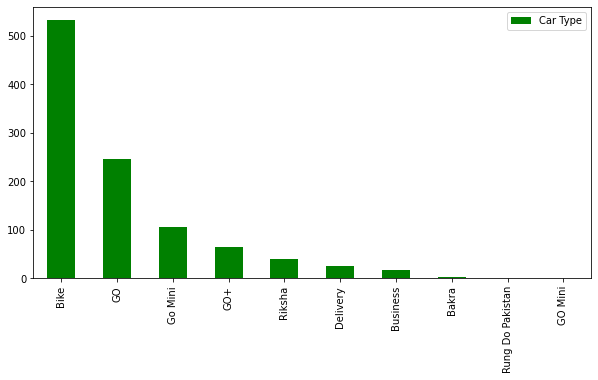

In [18]:
df['Car Type'].value_counts().to_frame().plot(kind='bar',color='green',figsize=(10,5))

## Which Day Has The Highest Number Of trips?

<AxesSubplot:>

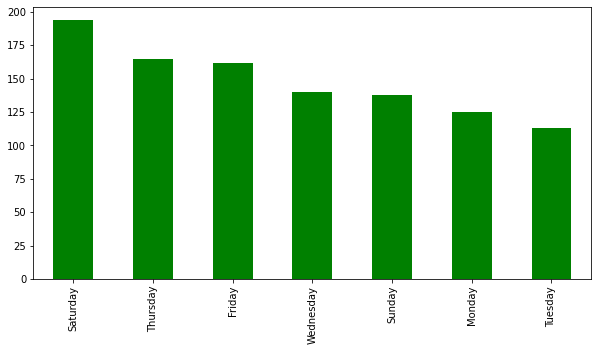

In [19]:
df['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

##### So, Saturday has the highest number of trips. 

## What Are The Number Of trips Per Each Day?

<AxesSubplot:>

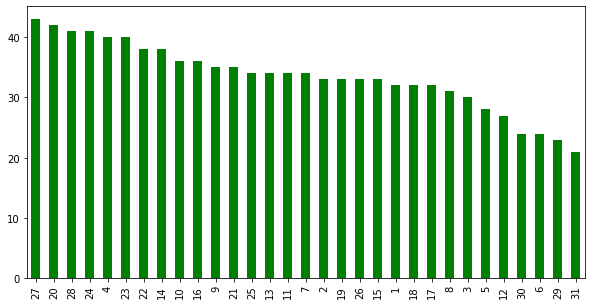

In [20]:
df['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

## Which month has the highest number of trips?

<AxesSubplot:>

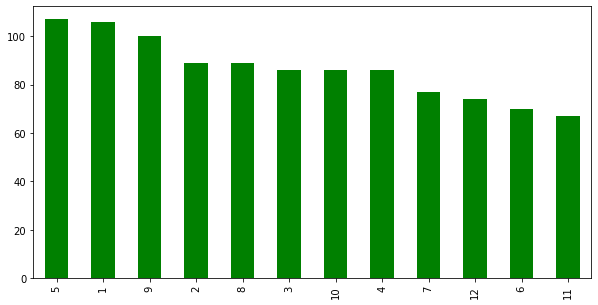

In [21]:
df['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

#### As we can see in 5th month we have the highest number of trips.

## Which hours of the day highest trips are made weekday wise?

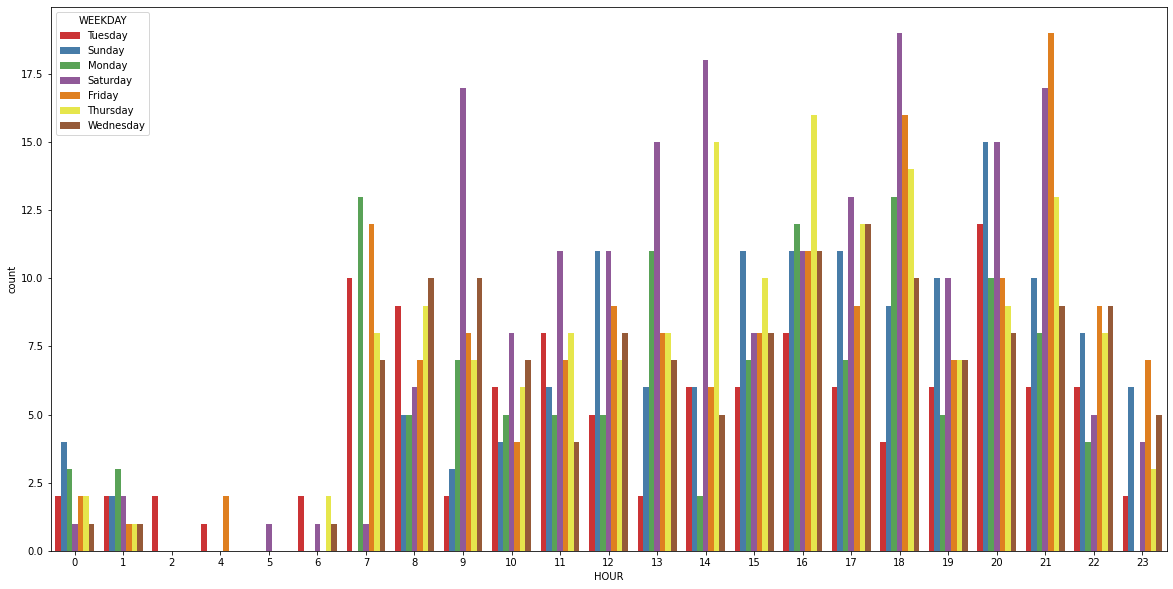

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df['HOUR'], hue=df['WEEKDAY'],palette="Set1")
plt.show()

## What is the average of the trip price ?

In [23]:
df['Trip Price'].mean()

114.96528447444551

In [24]:
df.describe()

,Booking ID,Trip ID,Duration,Total Distance,Moving Distance,Initial Wait,In-Journey Wait,Wait Time Min,Trip Price,Credit ID,HOUR,MINUTES,DAY,DAY_OF_WEEK,MONTH
count,1.037000e+03,1.037000e+03,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1.037000e+03,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,6.052021e+08,4.012311e+08,19.707811,8.454368,7.716628,2.807136,6.509161,9.315333,114.965284,2.570136e+05,14.795564,887.733848,16.058824,3.215043,6.245902
std,3.068935e+08,2.116776e+08,14.776732,6.560708,6.197182,3.456490,8.158372,8.750725,126.019268,6.574012e+05,5.223264,313.395858,8.690152,1.927510,3.443462
min,9.006497e+06,5.495172e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.621800e+04,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.084244e+08,1.970342e+08,11.000000,3.610000,3.073990,0.000000,2.000000,4.000000,11.000000,2.621800e+04,11.000000,660.000000,9.000000,2.000000,3.000000
50%,6.950000e+08,4.550000e+08,17.000000,7.470000,6.698430,2.000000,4.000000,7.000000,76.000000,2.621800e+04,16.000000,960.000000,16.000000,3.000000,6.000000
75%,8.520000e+08,5.710000e+08,26.000000,12.220000,11.514700,4.000000,8.000000,11.000000,173.000000,2.621800e+04,19.000000,1140.000000,24.000000,5.000000,9.000000
max,1.100000e+09,7.610000e+08,190.000000,51.560000,48.051200,34.000000,121.000000,121.000000,1052.000000,3.224899e+06,23.000000,1380.000000,31.000000,6.000000,12.000000


## What are the costs of the trips?

<AxesSubplot:>

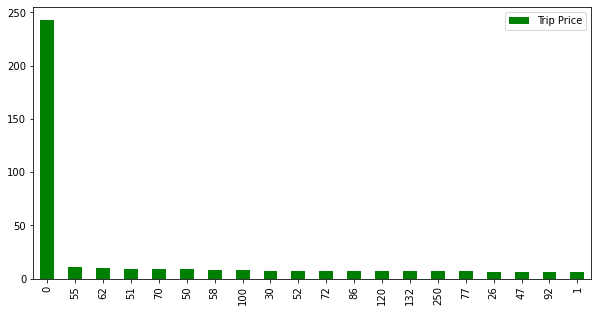

In [25]:
df['Trip Price'].value_counts().head(20).to_frame().plot(kind='bar', color='green',figsize=(10,5))

In [26]:
df['Trip Price'].value_counts()

0      243
55      11
62      10
51       9
70       9
      ... 
268      1
407      1
177      1
482      1
306      1
Name: Trip Price, Length: 320, dtype: int64

In [27]:
df['Trip Price'].max()

1052

In [28]:
df['Trip Price'].min()

0

In [29]:
df['Trip Price'].mode()

0    0
Name: Trip Price, dtype: int64

## What is the average duration of the trip?

In [30]:
df['Duration'].mean()

19.70781099324976

In [31]:
df=df.drop(['Booking ID','Trip ID','AA1','AA'],axis=1)

## How many trips booked according to passengers?

<AxesSubplot:>

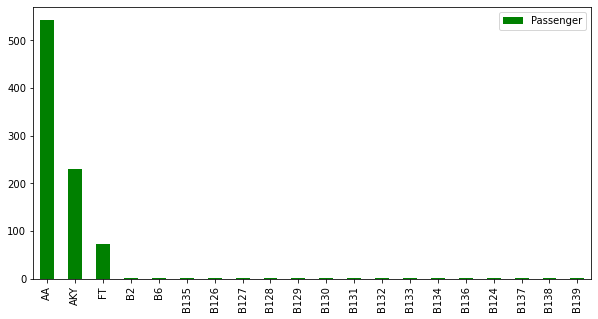

In [32]:
df.Passenger.value_counts().head(20).to_frame().plot(kind='bar', color='green',figsize=(10,5))

In [33]:
df.Passenger.unique()

array(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11',
       'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20',
       'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29',
       'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38',
       'B39', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47',
       'B48', 'B49', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56',
       'B57', 'B58', 'B59', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65',
       'B66', 'B67', 'B68', 'B69', 'B70', 'B71', 'B72', 'B73', 'B74',
       'B75', 'B76', 'B77', 'B78', 'B79', 'B80', 'B81', 'B82', 'B83',
       'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B90', 'B91', 'B92',
       'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'B100', 'B101',
       'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109',
       'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117',
       'B118', 'B119', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125',
       'B126', '

In [34]:
df=df.drop(['Passenger'],axis=1)

## From which location the highest number of trips booked?

<AxesSubplot:>

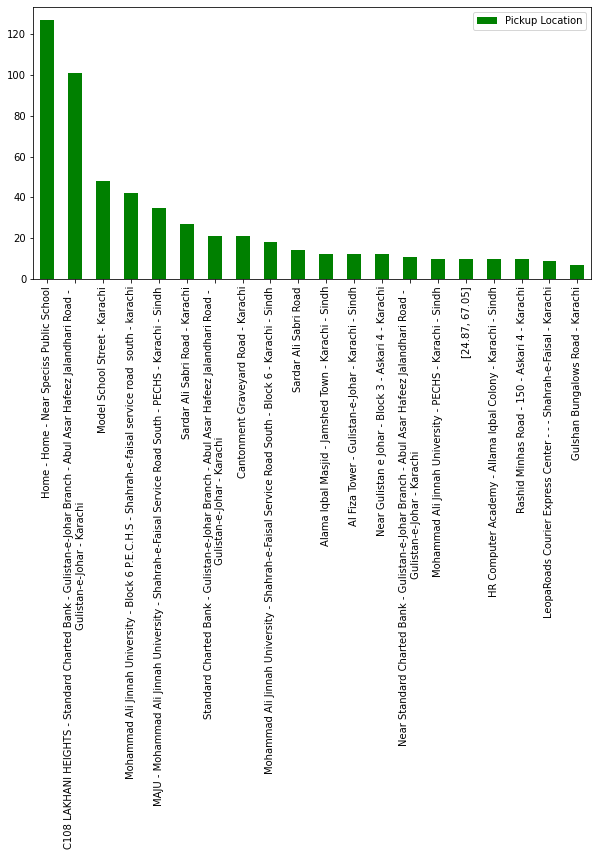

In [35]:
df['Pickup Location'].value_counts().head(20).to_frame().plot(kind='bar', color='green', figsize=(10,5))

In [36]:
df['Pickup Location'].unique()

array(['Alama Iqbal Masjid - Jamshed Town - Karachi - Sindh',
       'MCB Bank - M. A. Jinnah Road - Saddar - Karachi',
       '[24.87, 67.05]',
       'Mohammad Ali Jinnah University - Block 6 P.E.C.H.S - Shahrah-e-faisal service road  south - karachi',
       'Home Economics College - Club Road - Karachi',
       'Khatoon-e-Pakistan Government Degree College For Women - Aga Khan University Hospital - Karachi - Sindh',
       'HR Computer Academy - Allama Iqbal Colony - Karachi - Sindh',
       'Model School Street - Model School Street - PECHS - Karachi - Sindh',
       'Nandos - - - S.M.C.H.S. - Karachi',
       'Model School Street - Karachi',
       'KFC - Nursery, Karachi- Pick Up Point', '[24.86, 67.07]',
       'Techno City - Grant Road - Saddar Town - Karachi - Sindh',
       'Gari Khata  - Karim Lodge building  - Saddar - Karachi',
       'Mohammad Ali Jinnah University - Shahrah-e-Faisal Service Road South - Block 6 - Karachi - Sindh',
       'Plot L 174 - North Karachi Town

## How much distance covered in trips according to time?

<AxesSubplot:xlabel='Time "min"', ylabel='Distance "km"'>

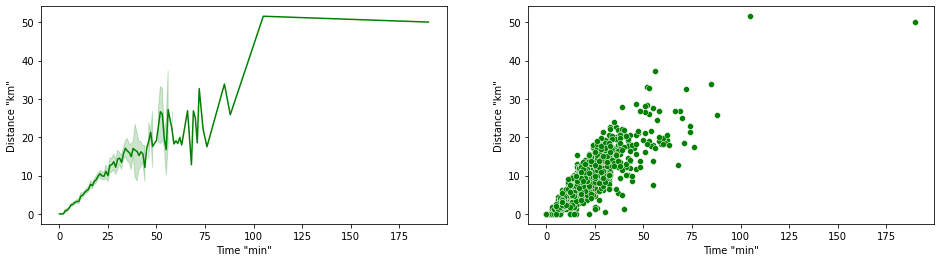

In [37]:
plt.figure(figsize = (16,4))


plt.subplot(1,2,1)
plt.xlabel('Time "min"')
plt.ylabel('Distance "km"')
sns.lineplot( x = df.Duration, y = df['Total Distance'], color = 'green')

plt.subplot(1,2,2)
plt.xlabel('Time "min"')
plt.ylabel('Distance "km"')
sns.scatterplot(x = df.Duration, y = df['Total Distance'], color = 'green')